In [12]:
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image,ImageOps
from skimage import exposure, transform

base_resolution = 1024 # used to be 512

def plotfiles(globstr,x1,y1,w,h):
    files = glob.glob(globstr,recursive=True)

    plt.figure(figsize=(20,40),facecolor='white')

    for count,file in enumerate(files):
        pardir = os.path.basename(os.path.abspath(file + '/..'))
        parpardir = os.path.basename(os.path.abspath(file + '/../..'))

        plt.subplot(8,4,count+1)

        I = io.imread(file)
        if parpardir == 'december':
            I = np.rot90(I,axes=(0,1))
            I = np.rot90(I,axes=(0,1))
            I = np.rot90(I,axes=(0,1))
        
        if not I.shape[0] is base_resolution:
            I = transform.resize(I,(base_resolution,base_resolution),order=3)

#         I = np.array(ImageOps.autocontrast(Image.fromarray(I),cutoff=1))
        I = exposure.equalize_adapthist(I,clip_limit=0.001)

        plt.imshow(I[x1:x1+h,y1:y1+w])
        plt.gca().axis('off')
        plt.xticks([], [])
        plt.yticks([], [])

        plt.title('%s : %s' % (parpardir,pardir))

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.01, hspace=0.1)
    plt.show()

## Lisa data january comparison

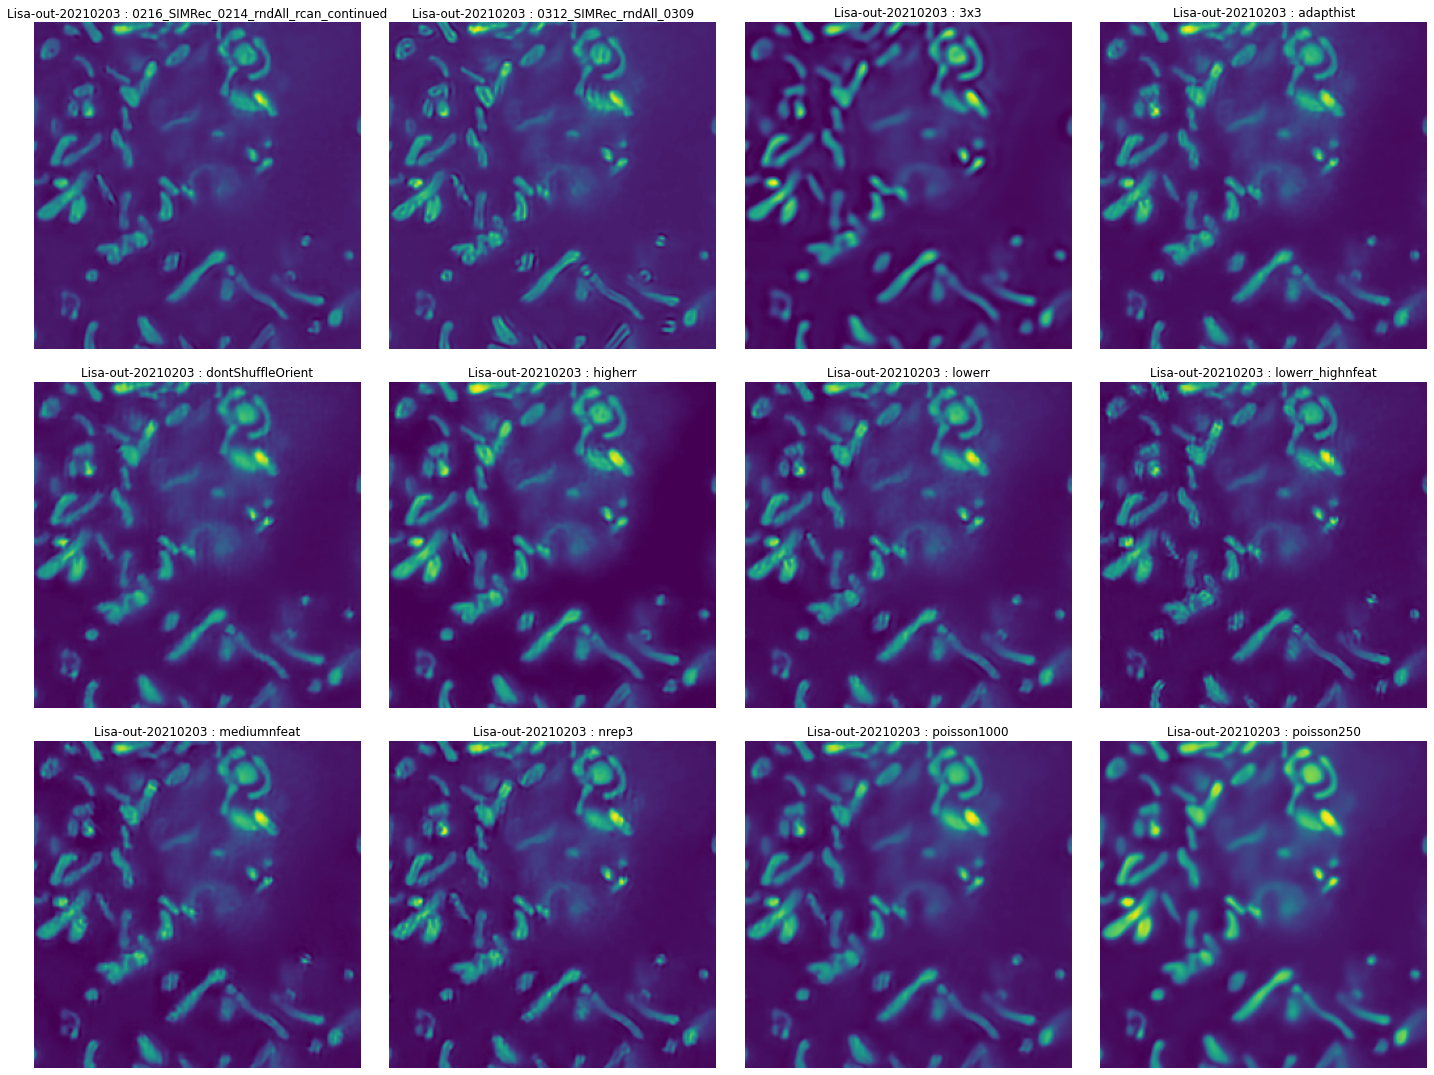

In [13]:
plotfiles('C:/Users/Charles/Desktop/Lisa-out-20210203/**/488_1.tif.png',300,360,250,250)

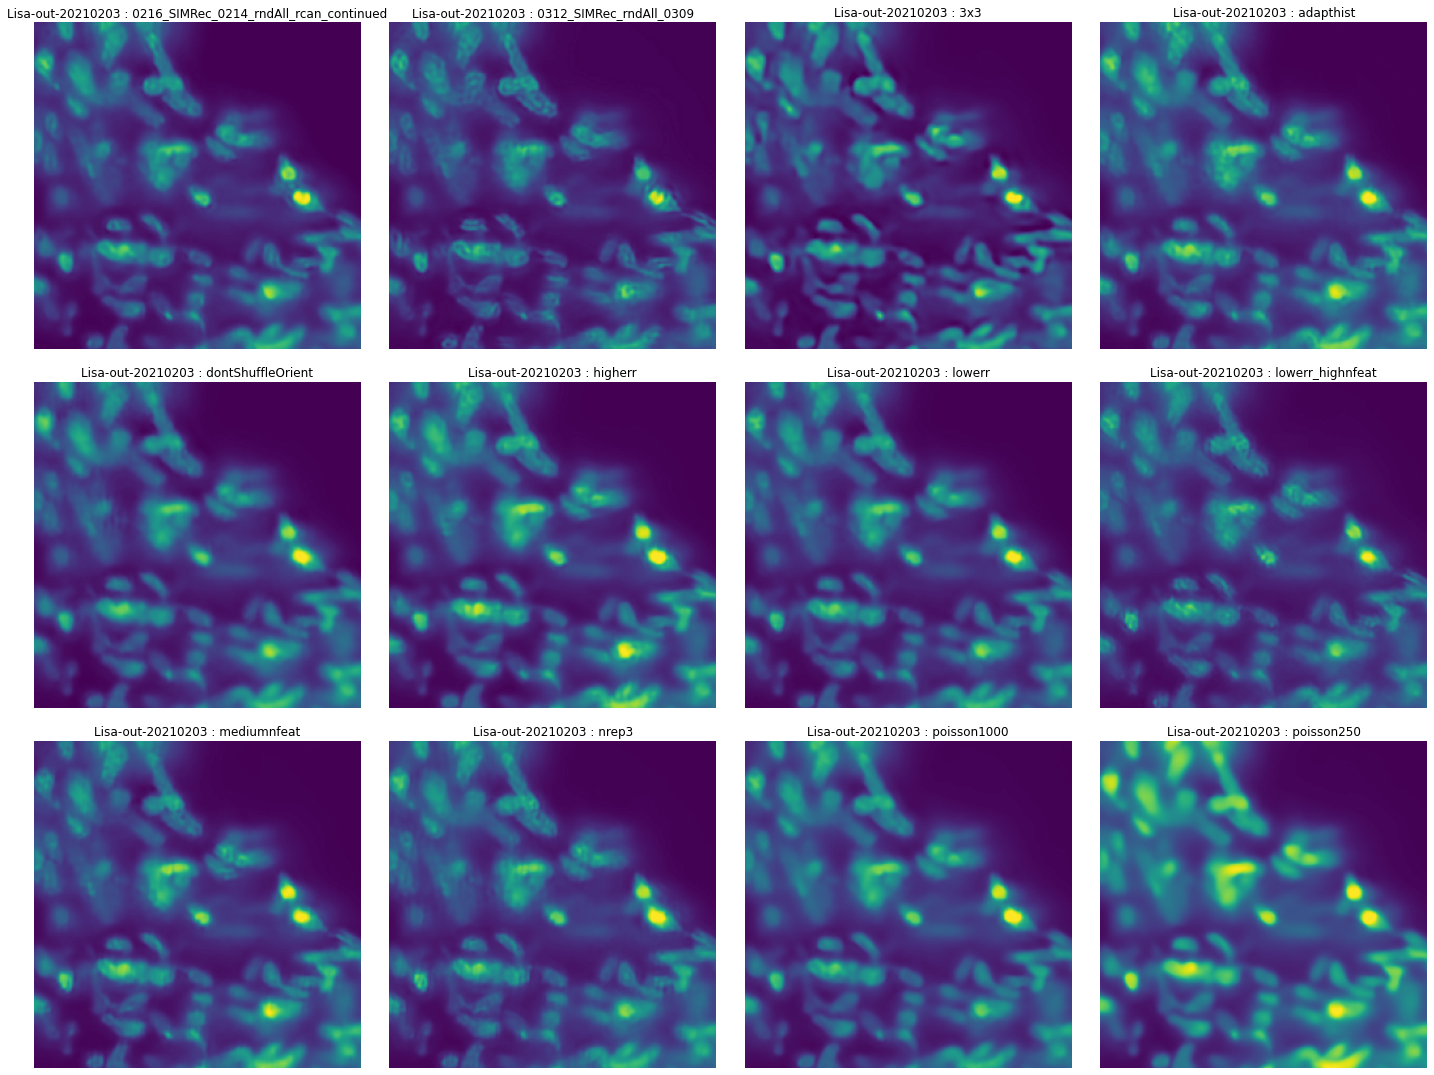

In [14]:
plotfiles('C:/Users/Charles/Desktop/Lisa-out-20210203/**/katharina_647_2*.png',300,360,250,250)